В данном ноутбуке представлены эксперименты с помощью традиционных методов машинного обучения.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

### Cчитываем данные и парсим их

In [2]:
Data = pd.read_csv('lyric.csv', header=None)

In [3]:
name_and_year = Data[0].str.split('-')

In [4]:
name = []
year = []
title = []
for s in name_and_year:
    name.append(s[0])
    year.append(s[1][-5:-1])
    title.append(s[1][:-7])

In [5]:
Data['title'] = title
Data['author_name'] = name
Data['year'] = Data[0].str[-5:-1].astype('int')

In [6]:
Data.columns = ['inf', 'text', 'title', 'author_name', 'year']

In [7]:
Data.index = np.array(range(Data.shape[0]))

In [8]:
D = Data.loc[Data.text.str.len() < 1014, :][Data.columns[1:]]

In [9]:
D.index = np.array(range(D.shape[0]))

D['name'] = pd.DataFrame(list(D.author_name.str.split(' ')), index = None)[0]
D['surname'] = pd.DataFrame(list(D.author_name.str.split(' ')), index = None)[1]

bithday = pd.read_csv('years.txt', sep = ' ', header = None)

bithday.columns = ['surname', 'name', 'year_bith']

D = D.merge(bithday, on=["surname", "name"])

D.index = np.array(range(D.shape[0]))

#D.year_bith = D.year_bith.str[:4]
D.year = D.year.astype('int')
D['age'] = D.year - D.year_bith

D.shape

(8871, 8)

### Посмотрим как выглядит итоговая таблица

In [10]:
D

,text,title,author_name,year,name,surname,year_bith,age
0,"\nО жизнь! ты миг, но миг прекрасный,\nМне нев...",Жизнь,Алексей Апухтин,1853,Алексей,Апухтин,1840,13
1,"\nДалеко от тебя, о родина святая,\nУж целый г...",К Родине,Алексей Апухтин,1853,Алексей,Апухтин,1840,13
2,\nЯ еду. На небе высоко\nПлывет уж бледная лун...,Старая дорога,Алексей Апухтин,1854,Алексей,Апухтин,1840,14
3,\n П. И. Чайковскому \n\nЧудный гений! В ть...,Гений поэта,Алексей Апухтин,1855,Алексей,Апухтин,1840,15
4,"\nМесяц вешний, ты ли это?\nТы, предвестник бл...",Май в Петербурге,Алексей Апухтин,1855,Алексей,Апухтин,1840,15
5,"\n А. П. Апухтиной \n\nНе знаю почему,...",Предчувствие,Алексей Апухтин,1855,Алексей,Апухтин,1840,15
6,"\nДайте мне наряд суровый,\nДайте мурмолку мою...",Желание славянина,Алексей Апухтин,1855,Алексей,Апухтин,1840,15
7,\n К. П. Апухтиной \n\nПесня туман...,Жизнь (К. П. Апухтиной),Алексей Апухтин,1856,Алексей,Апухтин,1840,16
8,"\nО друг неведомый! Предмет моей мечты,\nМой с...",Ответ анониму,Алексей Апухтин,1856,Алексей,Апухтин,1840,16
9,"\n П.И. Чайковскому\n \nЕдешь, едешь ...",Дорогой,Алексей Апухтин,1856,Алексей,Апухтин,1840,16


In [134]:
from pymystem3 import Mystem

m = Mystem()
def ngrams(text):
    return text.split(' ')
def clean(text):
    text = text.lower()
    lemmata = m.lemmatize(text)
    return ''.join(lemmata)#.split(' ')
def raw_documents(D):
    for i in D:
        s = ngrams(i)
        yield ' '.join(s)
        #yield i

### Удалим из текста лишние символы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dcfe0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ebebb00>]], dtype=object)

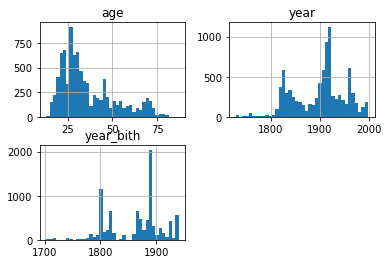

In [11]:
D.hist(bins = 40)

In [ ]:

def ngrams(text, n):
    n-=1
    return [text[i-n:i+1] for i in range(0, len(text), 3)][n:] 

### Удалим из текста лишние символы

D.text = D.text.str.lower()
D.text = D.text.str.replace(",", "")
D.text = D.text.str.replace(".", "")
D.text = D.text.str.replace("!", "")
D.text = D.text.str.replace("?", "")
D.text = D.text.str.replace("\n", " ")
D.text = D.text.str.replace(";", "")
D.text = D.text.str.replace("-", " ")
D.text = D.text.str.replace(":", "")
D.text = D.text.str.replace("\"", "")
D.text = D.text.str.replace("  ", " ")
D.text = D.text.str.replace("(", "")
D.text = D.text.str.replace(")", "")
#ngrams(D.text[0], 3)
#D.text = D.text.str.replace(" ", "")



def raw_documents():
    for i in D.text:
        s = ngrams(i, 5)
        #yield ' '.join(s)
        yield i






### Получим TF-IDF

In [ ]:
import sklearn
from sklearn import feature_extraction
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range = (1, 3))
tfidf.stop_words_ = {u'а', u'и'}
X = tfidf.fit_transform(raw_documents())
#ngrams(D.text[0], 3)

import sklearn
from sklearn import preprocessing
clf = sklearn.preprocessing.LabelEncoder()
clf.fit(D.author_name)
label = clf.transform(D.author_name)




### Выберем 12 случайных авторов, для тестирования

#### Обучаем регрессию на возраст автора, в котором он написал произведение

In [ ]:

r = np.random.randint(112, size = (12))


from sklearn.model_selection import LeaveOneGroupOut
from sklearn import linear_model
import sklearn
groups = np.zeros(label.shape).astype('int')
for q in r:
    groups[label == q] = 1 

logo = LeaveOneGroupOut()
logo.get_n_splits(X, D.age, groups)
y = D.age
clf = sklearn.linear_model.Ridge(alpha=1, fit_intercept=True, normalize=False, copy_X=True, 
                                 max_iter=None, tol=0.0001, solver='auto', random_state=None)

for train_index, test_index in logo.split(X, y, groups):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])
    clf.fit(X_train, y_train)
    print('Количество документов в тестовой выборке: ', X_test.shape[0])
    print('Качество на тестовой выборке при обучении: ', np.mean(np.abs(clf.predict(X_test) - y_test)))
    print('Качество на тестовой выборке при выборе ответа константой: ', np.mean(np.abs(31 - y_test)))
    print('')

clf = sklearn.linear_model.PassiveAggressiveRegressor(C=0.1, fit_intercept=True, n_iter=100, shuffle=True, 
                                                verbose=0, loss='epsilon_insensitive', epsilon=0.001, 
                                                random_state=5, warm_start=False)
for train_index, test_index in logo.split(X, y, groups):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])
    clf.fit(X_train, y_train)
    print('Количество документов в тестовой выборке: ', X_test.shape[0])
    print('Качество на тестовой выборке при обучении: ', np.mean(np.abs(clf.predict(X_test) - y_test)))
    print('Качество на тестовой выборке при выборе ответа константой: ', np.mean(np.abs(31 - y_test)))
    print('')





### Эвристические признаки

In [ ]:


def Concat_text(D):
    D.index = np.array(range(D.shape[0]))
    text = D.text
    D_array = np.array(D)
    Data = pd.DataFrame(index = np.array(range(D.shape[0]*(D.shape[0]-1))), columns = ['text1', 
                                                                                       'title1', 
                                                                                       'text2', 
                                                                                       'title2', 
                                                                                       'age',
                                                                                       ])
    L_text1 = []
    L_text2 = []
    L_title1 = []
    L_title2 = []
    L_age = []
    ind = 0
    for i in range(D.shape[0]):
        for j in range(D.shape[0]):
            if i != j:
              
            #Data.iloc[ind] = D['text'][i], D['title'][i], D['text'][j], D['title'][j], D['age'][i] >  D['age'][j]
                L_text1.append(text[i])
                L_text2.append(text[j])
                L_title1.append(D['title'][i])
                L_title2.append(D['title'][j])
                L_age.append(D['age'][i] > D['age'][j])

    Data.iloc[:, 0] = L_text1#D['text'][i]
    Data.iloc[:, 1] = L_title1
    Data.iloc[:, 2] = L_text2
    Data.iloc[:, 3] = L_title2
    Data.iloc[:, 4] = L_age
    return Data

def add_word(D):
    import nltk
    from nltk.tokenize import WhitespaceTokenizer
    from string import punctuation
    import pymorphy2
    import nltk
    from nltk.tokenize import WhitespaceTokenizer
    from string import punctuation
    D.index = np.array(range(D.shape[0]))
    
    from pymystem3 import Mystem

    m = Mystem()
    
    for i in range(D.shape[0]):
        lemmata = m.lemmatize(D['text'][i])
        lemmata = ''.join(lemmata)
        D['text'][i] = lemmata
    return D


def features_dataframe(D):
    D_train = pd.DataFrame()
    D_train['n_words_text1'] = D['text1'].str.count(' ')
    D_train['n_wors_title1'] = D['title1'].str.count(' ')
    D_train['n_string1'] = D['text1'].str.count('\n')
    D_train['mean_n_words_string1'] = D_train['n_words_text1']/D_train['n_string1']
    D_train['n_punctuation.1'] = D['text1'].str.count('.')
    D_train['n_punctuation,1'] = D['text1'].str.count(',')
    D_train['n_punctuation?1'] = D['text1'].str.count('\?')
    D_train['n_punctuation!1'] = D['text1'].str.count('!')

    D_train['mean_n_punctuation.1'] = D['text1'].str.count('.')/D_train['n_string1']
    D_train['mean_n_punctuation,1'] = D['text1'].str.count(',')/D_train['n_string1']
    D_train['mean_n_punctuation?1'] = D['text1'].str.count('\?')/D_train['n_string1']
    D_train['mean_n_punctuation!1'] = D['text1'].str.count('!')/D_train['n_string1']
    
    D_train['n_words_text2'] = D['text2'].str.count(' ')
    D_train['n_wors_title2'] = D['title2'].str.count(' ')
    D_train['n_string2'] = D['text2'].str.count('\n')
    D_train['mean_n_words_string2'] = D_train['n_words_text2']/D_train['n_string2']
    D_train['n_punctuation.2'] = D['text2'].str.count('.')
    D_train['n_punctuation,2'] = D['text2'].str.count(',')
    D_train['n_punctuation?2'] = D['text2'].str.count('\?')
    D_train['n_punctuation!2'] = D['text2'].str.count('!')


    D_train['mean_n_punctuation.2'] = D['text2'].str.count('.')/D_train['n_string2']
    D_train['mean_n_punctuation,2'] = D['text2'].str.count(',')/D_train['n_string2']
    D_train['mean_n_punctuation?2'] = D['text2'].str.count('\?')/D_train['n_string2']
    D_train['mean_n_punctuation!2'] = D['text2'].str.count('!')/D_train['n_string2']

    D_train['n_words_text_diff'] = D_train['n_words_text1'] - D_train['n_words_text2']
    D_train['n_wors_title_diff'] = D_train['n_wors_title1'] - D_train['n_wors_title2']
    D_train['n_string_diff'] = D_train['n_string1'] - D_train['n_string2']
    D_train['mean_n_words_string_diff'] = D_train['mean_n_words_string1'] - D_train['mean_n_words_string2']
    D_train['n_punctuation._diff'] = D_train['n_punctuation.1'] - D_train['n_punctuation.2']
    D_train['n_punctuation,_diff'] = D_train['n_punctuation,1'] - D_train['n_punctuation,2']
    D_train['n_punctuation?_diff'] = D_train['n_punctuation?1'] - D_train['n_punctuation?2']
    D_train['n_punctuation!_diff'] = D_train['n_punctuation!1'] - D_train['n_punctuation!2']

    D_train['mean_n_punctuation._diff'] = D_train['mean_n_punctuation.1'] - D_train['mean_n_punctuation.2']
    D_train['mean_n_punctuation,_diff'] = D_train['mean_n_punctuation,1'] - D_train['mean_n_punctuation,2']
    D_train['mean_n_punctuation?_diff'] = D_train['mean_n_punctuation?1'] - D_train['mean_n_punctuation?2']
    D_train['mean_n_punctuation!_diff'] = D_train['mean_n_punctuation!1'] - D_train['mean_n_punctuation!2']
    
    return D_train

In [ ]:
Data = pd.read_csv('lyric.csv', header=None)
name_and_year = Data[0].str.split('-')
name = []
year = []
title = []
for s in name_and_year:
    name.append(s[0])
    year.append(s[1][-5:-1])
    title.append(s[1][:-7])
    
Data['title'] = title
Data['author_name'] = name
Data['year'] = Data[0].str[-5:-1].astype('int')
Data.columns = ['inf', 'text', 'title', 'author_name', 'year']
Data.drop(np.array(range(Data.shape[0]))[np.array(Data.text.str.count(' ')<5)], axis = 0, inplace=True)
Data.index = np.array(range(Data.shape[0]))
D = Data.loc[Data.text.str.len() < 1014, :][Data.columns[1:]]
D.index = np.array(range(D.shape[0]))
D['name'] = pd.DataFrame(list(D.author_name.str.split(' ')), index = None)[0]
D['surname'] = pd.DataFrame(list(D.author_name.str.split(' ')), index = None)[1]
bithday = pd.read_csv('years.txt', sep = ' ', header = None)
bithday.columns = ['surname', 'name', 'year_bith']
D = D.merge(bithday, on=["surname", "name"])
D.index = np.array(range(D.shape[0]))

D.year = D.year.astype('int')
D['age'] = D.year - D.year_bith


D.text = D.text.str.lower()
D.text = D.text.str.replace('\n', ' ')

import string

translator = str.maketrans('', '', string.punctuation)
D.text = D.text.str.translate(translator)

D.text = D.text.str.split(' ')

import gensim

model = gensim.models.Word2Vec.load('model_w2v',mmap='r')

data = np.zeros((D.text.shape[0], 140,  300))
i = 0
for text in D.text:
    j = 0
    for word in text:
        if j > 0:
            try:
                data[i, j] = model.wv[word]
            except:
                j -= 1
        j += 1
    i += 1

r = 0#np.random.randint(D.author_name.unique().shape[0], size = (1))

from sklearn.model_selection import LeaveOneGroupOut
from sklearn import ensemble
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
clf = sklearn.preprocessing.LabelEncoder()
clf.fit(D.author_name)
label = clf.transform(D.author_name)


from sklearn.model_selection import train_test_split


groups = np.zeros(label.shape).astype('int')
X = D.copy()
Y = X['age']
#X.drop('age', axis = 1, inplace = True)

#clf.fit(X[:70000], Y[:70000])
X_train, X_test, y_train, y_test = train_test_split(data[label == r], Y[label == r], test_size=0.2, random_state=2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
data_a, data_b, label = Concat_data(X_train, np.array(y_train))
data_test_a, data_test_b, lab = Concat_data(X_test, np.array(y_test))

r = 0#np.random.randint(D.author_name.unique().shape[0], size = (1))

from sklearn.model_selection import LeaveOneGroupOut
from sklearn import ensemble
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
clf = sklearn.preprocessing.LabelEncoder()
clf.fit(D.author_name)
label = clf.transform(D.author_name)


from sklearn.model_selection import train_test_split


groups = np.zeros(label.shape).astype('int')
X = D.copy()
Y = X['age']
#X.drop('age', axis = 1, inplace = True)

clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_depth=None, min_samples_split=2, 
                                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                              max_features=9, max_leaf_nodes=None, 
                                              min_impurity_split=1e-07, bootstrap=True, 
                                              oob_score=False, n_jobs=-1, random_state=1, 
                                              verbose=0, warm_start=False, class_weight=None)
#clf.fit(X[:70000], Y[:70000])
X_train, X_test, y_train, y_test = train_test_split(X[label == r], Y[label == r], test_size=0.2, random_state=2)

X_train = add_word(X_train)
X_test = add_word(X_test)
X_train = Concat_text(X_train)

X_test = Concat_text(X_test)
y_train = X_train['age']
y_test = X_test['age']
X_train.drop('age', axis = 1, inplace = True)
X_test.drop('age', axis = 1, inplace = True)
X_train = features_dataframe(X_train)
X_test = features_dataframe(X_test)
        
print('fit')
clf.fit(X_train, y_train.astype('int'))
print(X_test.shape)
print(np.mean(clf.predict(X_test) == y_test.astype('int')))
print(np.mean(np.abs(y_test.astype('int'))))
print(np.mean(np.abs(y_train.astype('int'))))





In [ ]:
r = 6#np.random.randint(D.author_name.unique().shape[0], size = (1))
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import ensemble
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
#for r in Big_author:
clf = sklearn.preprocessing.LabelEncoder()
clf.fit(D.author_name)
label = clf.transform(D.author_name)


from sklearn.model_selection import train_test_split


groups = np.zeros(label.shape).astype('int')
X = D.copy()
Y = X['age']
#X.drop('age', axis = 1, inplace = True)

clf = sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                              fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                              random_state=None, solver='liblinear', max_iter=1000, 
                                              multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1)
#clf.fit(X[:70000], Y[:70000])
X_train, X_test, y_train, y_test = train_test_split(X[label == r], Y[label == r], test_size=0.2, random_state=2)

X_train = add_word(X_train)
X_test = add_word(X_test)
X_train = Concat_text(X_train)

X_test = Concat_text(X_test)
y_train = X_train['age']
y_test = X_test['age']
X_train.drop('age', axis = 1, inplace = True)
X_test.drop('age', axis = 1, inplace = True)
X_train_my_feat = features_dataframe(X_train)
X_test_my_feat = features_dataframe(X_test)

tfidf1 = sklearn.feature_extraction.text.TfidfVectorizer(sublinear_tf = True, ngram_range = (1,1 ), max_df = 0.9)
tfidf2 = sklearn.feature_extraction.text.TfidfVectorizer(sublinear_tf = True, ngram_range = (1,1), max_df = 0.9)
#tfidf.stop_words_ = {u'а', u'и'}
tfidf1.fit(raw_documents(X_train.text1))
#tfidf2.fit(raw_documents(X_test.text1))
X1 = tfidf1.transform(raw_documents(X_train.text1))
X2 = tfidf1.transform(raw_documents(X_train.text2))
#ngrams(D.text[0], 3)

X_train = hstack( [X1, X2] )

X1 = tfidf1.transform(raw_documents(X_test.text1))
X2 = tfidf1.transform(raw_documents(X_test.text2))
#ngrams(D.text[0], 3)

X_test = hstack( [X1, X2] )

print('fit')
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
svd = TruncatedSVD(n_components=100, n_iter=30, random_state=42)
svd.fit(X_train)
X_train_n = svd.transform(X_train)
X_test_n = svd.transform(X_test)

X_train_n =  np.hstack([X_train_n, X_train_my_feat])
X_test_n = np.hstack([X_test_n, X_test_my_feat])
clf.fit(X_train, y_train.astype('int'))
print(X_test.shape)
lr = clf.predict_proba(X_test)[:,1]
print(np.mean(clf.predict(X_test) == y_test.astype('int')))
print(np.mean(np.abs(y_test.astype('int'))))
print(np.mean(np.abs(y_train.astype('int'))))




### Лучший результат полученный с помощью традиционных методов

In [136]:
import pandas as pd
import numpy as np
%matplotlib inline
Data = pd.read_csv('lyric.csv', header=None)
name_and_year = Data[0].str.split('-')
name = []
year = []
title = []
for s in name_and_year:
    name.append(s[0])
    year.append(s[1][-5:-1])
    title.append(s[1][:-7])
    
Data['title'] = title
Data['author_name'] = name
Data['year'] = Data[0].str[-5:-1].astype('int')
Data.columns = ['inf', 'text', 'title', 'author_name', 'year']
Data.drop(np.array(range(Data.shape[0]))[np.array(Data.text.str.count(' ')<5)], axis = 0, inplace=True)
Data.index = np.array(range(Data.shape[0]))
D = Data.loc[Data.text.str.len() < 1014, :][Data.columns[1:]]
D.index = np.array(range(D.shape[0]))
D['name'] = pd.DataFrame(list(D.author_name.str.split(' ')), index = None)[0]
D['surname'] = pd.DataFrame(list(D.author_name.str.split(' ')), index = None)[1]
bithday = pd.read_csv('years.txt', sep = ' ', header = None)
bithday.columns = ['surname', 'name', 'year_bith']
D = D.merge(bithday, on=["surname", "name"])
D.index = np.array(range(D.shape[0]))

D.year = D.year.astype('int')
D['age'] = D.year - D.year_bith



In [137]:
T = []
for t in D.text:
    T.append(clean(t))
#D_new = D.copy()
D.text = T

In [145]:
r = 0#np.random.randint(D.author_name.unique().shape[0], size = (1))
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import ensemble
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
#for r in Big_author:
clf = sklearn.preprocessing.LabelEncoder()
clf.fit(D.author_name)
label = clf.transform(D.author_name)


from sklearn.model_selection import train_test_split


groups = np.zeros(label.shape).astype('int')
X = D.copy()
Y = X['age']
i = 0
L = [0,6, 15, 17, 19, 20, 25, 28, 53, 55, 58]
# for r in np.unique(label):
#     if X[label == r].shape[0]>100:
#         L.append(i) 
#     i+=1
#X.drop('age', axis = 1, inplace = True)
res = 0
res_lsa = 0
for r in L:
    clf = sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                          fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                          random_state=None, solver='liblinear', max_iter=1000, 
                                          multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1)
    #clf.fit(X[:70000], Y[:70000])
    print(list(X[label == r]['author_name'])[0])
    X_train, X_test, y_train, y_test = train_test_split(X[label == r], Y[label == r], test_size=0.2, random_state=2)
    m = Mystem()
    X_train = add_word(X_train)
    X_test = add_word(X_test)
    X_train = Concat_text(X_train)

    X_test = Concat_text(X_test)
    y_train = X_train['age']
    y_test = X_test['age']
    X_train.drop('age', axis = 1, inplace = True)
    X_test.drop('age', axis = 1, inplace = True)
    X_train_my_feat = features_dataframe(X_train)
    X_test_my_feat = features_dataframe(X_test)

    tfidf1 = sklearn.feature_extraction.text.TfidfVectorizer(sublinear_tf = True, ngram_range = (1,1 ), max_df = 0.9)
    tfidf2 = sklearn.feature_extraction.text.TfidfVectorizer(sublinear_tf = True, ngram_range = (1,1), max_df = 0.9)
    
    tfidf1.fit(X_train.text1)
    X1 = tfidf1.transform(X_train.text1)
    
    X2 = tfidf1.transform(X_train.text2)


    X_train = hstack( [X1, X2] )

    X1 = tfidf1.transform(X_test.text1)
    X2 = tfidf1.transform(X_test.text2)
  

    X_test = hstack( [X1, X2] )

    from sklearn.decomposition import TruncatedSVD
    from sklearn.random_projection import sparse_random_matrix
    svd = TruncatedSVD(n_components=50, n_iter=10, random_state=42)
    svd.fit(X_train)
    X_train_n = svd.transform(X_train)
    X_test_n = svd.transform(X_test)

    X_train_n =  np.hstack([X_train_n, X_train_my_feat])
    X_test_n = np.hstack([X_test_n, X_test_my_feat])
    clf.fit(X_train, y_train.astype('int'))

    lr = clf.predict_proba(X_test)[:,1]
    print('BOW and TF IDF')
    print('size of X_test:', X_test.shape, 'accuracy:', np.mean((lr>0.5) == y_test.astype('int')))
    res += np.mean((lr>0.5) == y_test.astype('int'))
    
    print('LSA')
    clf.fit(X_train_n, y_train.astype('int'))
    lsa = clf.predict(X_test_n)
    print('size of X_test_n:', X_test_n.shape, 'accuracy:', np.mean((lsa>0.5) == y_test.astype('int')))
    res_lsa += np.mean((lsa>0.5) == y_test.astype('int'))
    print(np.mean(((lsa*0.3+ lr*0.7) >0.5) == y_test.astype('int')))
    
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=50, criterion='gini', 
                                              max_depth=None, min_samples_split=2, 
                                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                              max_features=30, max_leaf_nodes=None, 
                                              min_impurity_split=1e-07, bootstrap=True, 
                                              oob_score=False, n_jobs=-1, random_state=1, 
                                              verbose=0, warm_start=False, class_weight=None)

        
    clf.fit(X_train_n, y_train.astype('int'))
    print(X_test_n.shape)
    print(np.mean((clf.predict(X_test_n)) == y_test.astype('int')))
    print(np.mean((clf.predict_proba(X_test_n)[:,1]*0.4 + lr*0.6 + lsa*0.1 > 0.5) == y_test.astype('int')))
    print()
    print()
#print(np.mean(np.abs(y_test.astype('int'))))
#print(np.mean(np.abs(y_train.astype('int'))))


Александр Блок 
BOW and TF IDF
size of X_test: (1892, 5598) accuracy: 0.698202959831
LSA
size of X_test_n: (1892, 64) accuracy: 0.643763213531
0.667019027484
(1892, 64)
0.59355179704
0.679175475687


Алексей Апухтин 
BOW and TF IDF
size of X_test: (420, 4252) accuracy: 0.457142857143
LSA
size of X_test_n: (420, 64) accuracy: 0.652380952381
0.557142857143
(420, 64)
0.564285714286
0.545238095238


Аполлон Майков 
BOW and TF IDF
size of X_test: (462, 4384) accuracy: 0.761904761905
LSA
size of X_test_n: (462, 64) accuracy: 0.575757575758
0.699134199134
(462, 64)
0.701298701299
0.753246753247


Афанасий Фет 
BOW and TF IDF
size of X_test: (2756, 6764) accuracy: 0.748911465893
LSA
size of X_test_n: (2756, 64) accuracy: 0.684325108853
0.718432510885
(2756, 64)
0.646226415094
0.731132075472


Булат Окуджава 
BOW and TF IDF
size of X_test: (506, 5364) accuracy: 0.608695652174
LSA
size of X_test_n: (506, 64) accuracy: 0.579051383399
0.586956521739
(506, 64)
0.509881422925
0.592885375494


Валери

In [ ]:
X_train_n =  np.hstack([X_train_n, X_train_my_feat])
X_test_n = np.hstack([X_test_n, X_test_my_feat])
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=50, criterion='gini', 
                                              max_depth=None, min_samples_split=2, 
                                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                              max_features=30, max_leaf_nodes=None, 
                                              min_impurity_split=1e-07, bootstrap=True, 
                                              oob_score=False, n_jobs=-1, random_state=1, 
                                              verbose=0, warm_start=False, class_weight=None)

        
print('fit')
clf.fit(X_train_n, y_train.astype('int'))
print(X_test_n.shape)
print(np.mean((clf.predict_proba(X_test_n)[:,1]*0.5 + lr*0.5 > 0.5) == y_test.astype('int')))
print(np.mean(np.abs(y_test.astype('int'))))
print(np.mean(np.abs(y_train.astype('int'))))